# Condition
- without outlier handling
- automl : gradient boosting classifier

<h1>Changes</h1>
<br>Hans:
<br>- used recall instead of accuracy in compare_models()
<br>- used new SGDClassifier
<br>- plot Precision-Recall curve
<br>- conclusion: outlier detection/removal is 100% still needed due to bad recall results in all models

### Basic data analysis or exploratory data analysis (EDA)

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# check installed version
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pycaret
import pycaret
pycaret.__version__

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/c7/d8/4e703f17f17d7d7764fe6d586872e787ce3a248640221f5f2d586f671eee/pycaret-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/160.5 kB 330.3 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.5 kB 731.4 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.5 kB 731.4 kB/s eta 0:00:01
     ------------------------------------ 160.5/160.5 kB 642.2 kB/s eta 0:00:00
  Preparing metadata (setup.py

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


'3.3.0'

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('C:/Users/hansj/OneDrive/Desktop/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [7]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [10]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [11]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

seriousdlqin2yrs
0    93.316
1     6.684
Name: count, dtype: float64

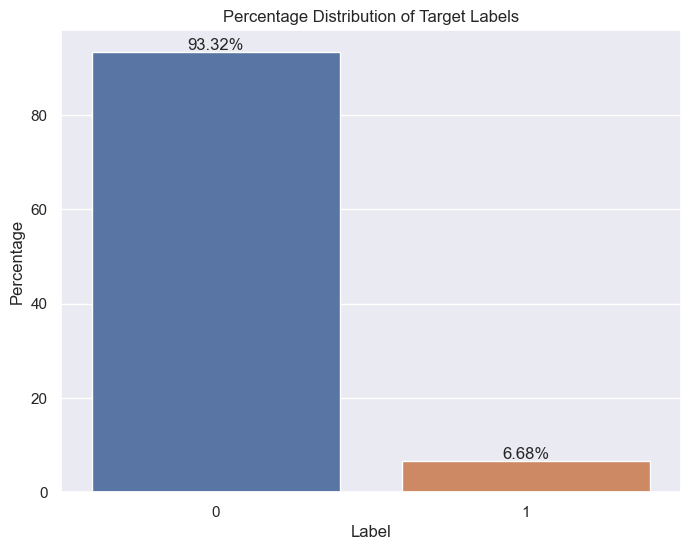

In [12]:
# Revised Plot
# Plotting the percentage distribution
sns.set()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=percentage_labels.index, y=percentage_labels.values)
ax.set_title('Percentage Distribution of Target Labels')
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, '{:.2f}%'.format(height), ha="center")
plt.show()


### Missing values

In [13]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

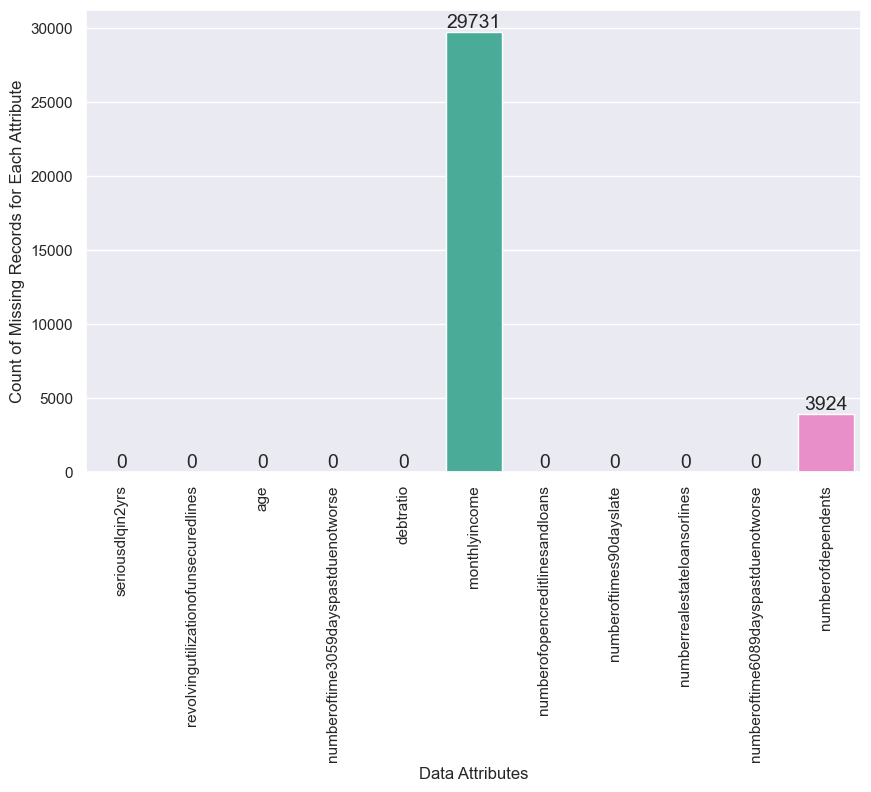

In [14]:
# revised code 
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=x, y=y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("Count of Missing Records for Each Attribute")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [17]:
# Actual replacement of the missing value using median value.
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [18]:
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [19]:
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


In [20]:
from pycaret.classification import * 
s = setup(data = training_data, target = 'seriousdlqin2yrs')

,Description,Value
0,Session id,6374
1,Target,seriousdlqin2yrs
2,Target type,Binary
3,Original data shape,"(150000, 11)"
4,Transformed data shape,"(150000, 11)"
5,Transformed train set shape,"(105000, 11)"
6,Transformed test set shape,"(45000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [21]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [22]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [23]:
# init setup on exp
exp.setup(data = training_data, target = 'seriousdlqin2yrs', session_id=123)

,Description,Value
0,Session id,123
1,Target,seriousdlqin2yrs
2,Target type,Binary
3,Original data shape,"(150000, 11)"
4,Transformed data shape,"(150000, 11)"
5,Transformed train set shape,"(105000, 11)"
6,Transformed test set shape,"(45000, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9371,0.8631,0.1946,0.5893,0.2925,0.2682,0.3142,10.9000
lightgbm,Light Gradient Boosting Machine,0.9367,0.8624,0.1868,0.5832,0.2829,0.2588,0.3057,0.7880
ada,Ada Boost Classifier,0.9361,0.8585,0.2113,0.5595,0.3066,0.2802,0.3174,2.7170
rf,Random Forest Classifier,0.9356,0.8375,0.1888,0.5538,0.2815,0.2562,0.2977,9.6610
lr,Logistic Regression,0.9339,0.6963,0.0503,0.5685,0.0922,0.0822,0.1542,5.7610
lda,Linear Discriminant Analysis,0.9336,0.6971,0.1022,0.5164,0.1703,0.1517,0.2081,0.1610
ridge,Ridge Classifier,0.9334,0.0000,0.0180,0.5547,0.0347,0.0307,0.0906,0.1040
dummy,Dummy Classifier,0.9332,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0820
et,Extra Trees Classifier,0.9330,0.8229,0.1918,0.4981,0.2768,0.2489,0.2805,5.8230
nb,Naive Bayes,0.9325,0.7076,0.0237,0.4071,0.0447,0.0377,0.0850,0.0880


In [25]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9372,0.8636,0.1944,0.5930,0.2926,0.2685,0.3152,11.6780
lightgbm,Light Gradient Boosting Machine,0.9371,0.8630,0.1961,0.5886,0.2940,0.2696,0.3151,0.7550
ada,Ada Boost Classifier,0.9358,0.8585,0.2132,0.5527,0.3075,0.2808,0.3163,2.5420
rf,Random Forest Classifier,0.9351,0.8383,0.1889,0.5409,0.2800,0.2542,0.2934,9.8180
lr,Logistic Regression,0.9340,0.6970,0.0510,0.5717,0.0935,0.0834,0.1561,4.1620
lda,Linear Discriminant Analysis,0.9336,0.6938,0.0996,0.5193,0.1671,0.1488,0.2064,0.1550
ridge,Ridge Classifier,0.9334,0.0000,0.0182,0.5392,0.0352,0.0311,0.0897,0.0810
dummy,Dummy Classifier,0.9332,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0750
nb,Naive Bayes,0.9325,0.7050,0.0247,0.4159,0.0464,0.0392,0.0875,0.0900
et,Extra Trees Classifier,0.9323,0.8199,0.1812,0.4831,0.2635,0.2356,0.2673,5.5150


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9242,0.8013,0.3112,0.4122,0.3544,0.3150,0.3186,0.1510
dt,Decision Tree Classifier,0.8974,0.6123,0.2813,0.2564,0.2682,0.2132,0.2135,0.6340
ada,Ada Boost Classifier,0.9361,0.8585,0.2113,0.5595,0.3066,0.2802,0.3174,2.7750
gbc,Gradient Boosting Classifier,0.9371,0.8631,0.1946,0.5893,0.2925,0.2682,0.3142,10.8700
et,Extra Trees Classifier,0.9330,0.8229,0.1918,0.4981,0.2768,0.2489,0.2805,5.6090
rf,Random Forest Classifier,0.9356,0.8375,0.1888,0.5538,0.2815,0.2562,0.2977,9.4510
lightgbm,Light Gradient Boosting Machine,0.9367,0.8624,0.1868,0.5832,0.2829,0.2588,0.3057,0.7700
lda,Linear Discriminant Analysis,0.9336,0.6971,0.1022,0.5164,0.1703,0.1517,0.2081,0.1610
lr,Logistic Regression,0.9339,0.6963,0.0503,0.5685,0.0922,0.0822,0.1542,5.7610
svm,SVM - Linear Kernel,0.9244,0.0000,0.0259,0.3530,0.0406,0.0247,0.0587,0.3210


In [28]:
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=6374, splitter='best'),
 AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=6374)]

In [30]:
#blend_model = blend_models(best_recall_models_top3)

In [31]:
#added SGDClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
import lightgbm as lgb

In [32]:
#slice into predictor vs predicted value for training
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [51]:
gbMod = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=5334, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
gbMod.fit(X_train, y_train)
gbMod.score(X_test, y_test)

0.9364266666666666

In [ ]:
#test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [ ]:
#roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

In [34]:
sgd_clf = SGDClassifier(random_state=5334)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5334, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import cross_val_score
#at first glance an accuracy of 90+% is very good, but..
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.92386667, 0.93237333, 0.92504   ])

In [37]:
# A purely dumb classifier that predicts everything to be false(not default)
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
print(any(dummy_clf.predict(X_train)))

False


In [38]:
#a dumb classifier has the same accuracy as our previous one, so accuracy is misleading in a skewed dataset like ours
cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.93362667, 0.93362667, 0.93365333])

<hr style="border:2px solid gray">
<h2>Model Selection Metrics</h2>
<hr style="border:2px solid gray">

In [53]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gbMod, X_train, y_train, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)
cm

array([[103965,   1069],
       [  5995,   1471]], dtype=int64)

In [60]:
y_scores = cross_val_predict(gbMod, X_train, y_train, cv=3, method = "decision_function")

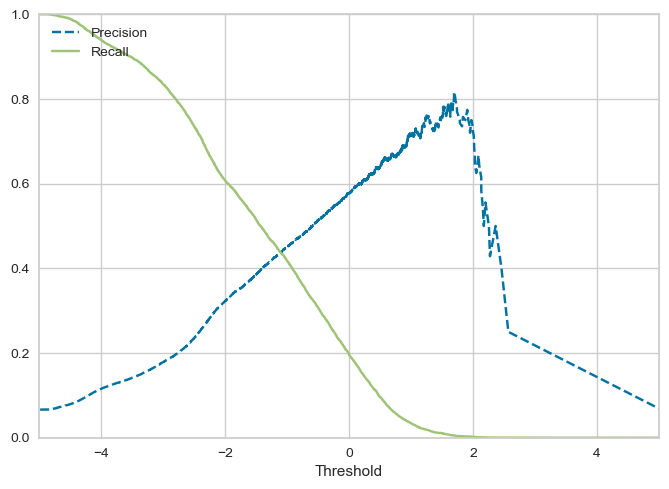

In [64]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])
    plt.xlim([-5,5])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

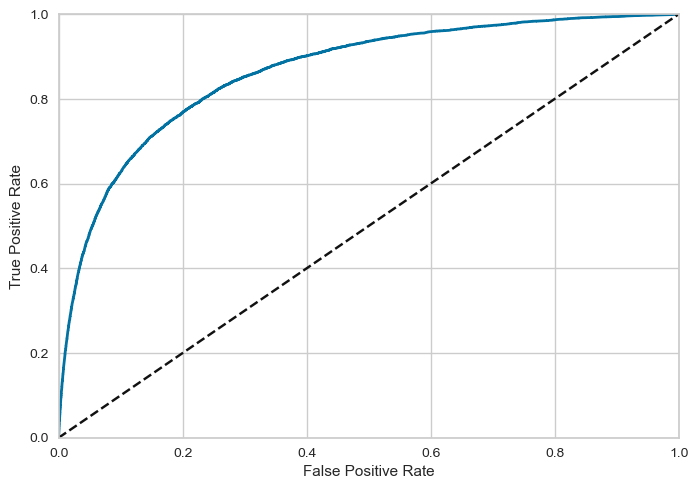

In [59]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()